# Вступление

Добрый день. Меня зовут Васюхин Артём и это мой проект по анализу данных сервиса "Яндекс.Музыка"

## Описание проекта

Мы располагаем данными сервиса "Яндекс.Музыка". Наша задача - ознакомиться с данными, провести предобработку и исследовательский анализ данных пользователей Москвы и Санкт-Петербурга.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.


Данные имеют табличную форму со следующими полями:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.


## Импорт библиотек и данных

In [18]:
import pandas as pd # импорт библиотеки pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('yandex_music_project.csv')
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [20]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — некорректный формат написания названий.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

In [21]:
df.columns # перечень названий столбцов таблицы df

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

In [22]:
df.columns = df.columns.str.strip()
df = df.rename(columns={'userID': 'user_id', 
                        'Track': 'track', 
                        'City': 'city', 
                        'Day': 'day'}) 
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### Пропуски

In [23]:
df.isna().sum() # подсчёт пропусков

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

Пропуски в `track` и `artist` не важны для нашего текущего исследования. Они будут заменены явными обозначеиями.

Прпоуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. Учитывая, что данные закодированы, то заполнить пропуски корректно мы не можем. Таким образом, мы их также заполним явным обозначением.

In [24]:
df[df.genre.isna()]

,user_id,track,artist,genre,city,time,day
15,E3C5756F,NaN,NaN,NaN,Moscow,09:24:51,Monday
35,A8AE9169,NaN,NaN,NaN,Moscow,08:56:10,Monday
54,3FA9A6A8,Inside Out,NaN,NaN,Moscow,10:00:41,Friday
161,364C85C0,NaN,NaN,NaN,Moscow,20:06:58,Monday
182,4AFB623B,My Name Is Love,NaN,NaN,Moscow,20:23:47,Wednesday
...,...,...,...,...,...,...,...
64792,7D9627FD,NaN,NaN,NaN,Moscow,08:57:15,Monday
64837,6E12D163,Fantasy Boy,NEW BACCARA,NaN,Moscow,20:51:44,Friday
64901,90B5E5A2,Hearts & Silence,Myon x Late Night Alumni,NaN,Moscow,09:23:42,Friday
64930,A8AE9169,NaN,NaN,NaN,Moscow,08:54:17,Friday


In [25]:
columns_to_replace = ['track', 'artist', 'genre']
for value in columns_to_replace:
    df = df.fillna('unknown') #перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
    
df.isna().sum() # подсчёт пропусков

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Дубликаты

In [26]:
df.duplicated().sum() # подсчёт явных дубликатов

3826

In [27]:
df = df.drop_duplicates().reset_index(drop=True) # удаление явных дубликатов
df.duplicated().sum() # проверка на отсутствие дубликатов

0

In [28]:
genre_unique = df['genre'].sort_values() # отсортируем для наглядной оценки
genre_unique = genre_unique.unique()
genre_unique # промотр уникальных названий жанров

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

In [29]:
genre_duplicates = ['hip', 'hop', 'hip-hop']
df = df.replace(genre_duplicates, 'hiphop') # устранение неявных дубликатов

In [30]:
genre_unique

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Вы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения вы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга.
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


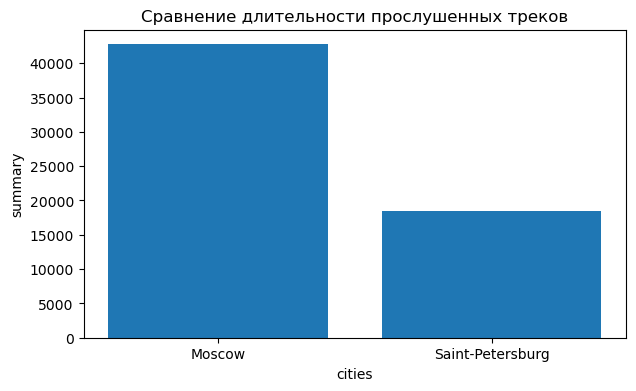

In [69]:
activity_cities = df.groupby('city')['time'].count()

# создадим функцию для визуализации наших расчётов
def cities_visualisation(index, values, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize = (7, 4))
    ax.bar(index, values)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return plt.show();

cities_visualisation(activity_cities.index, 
                     activity_cities.values, 
                     'cities', 
                     'summary', 
                     'Сравнение длительности прослушенных треков')

В Москве прослушиваний **больше**, чем в Петербурге.

Тем не менее, мы не можем окончательно утверждать, что в Москве люди слушают музыку чаще, основываясь лишь на этом графике и этих данных, так как людей в Москве больше, а значит и в совокупности прослушанных треков будет больше.

Сформируем другую группу, объединив дни недели и время прослушивания.

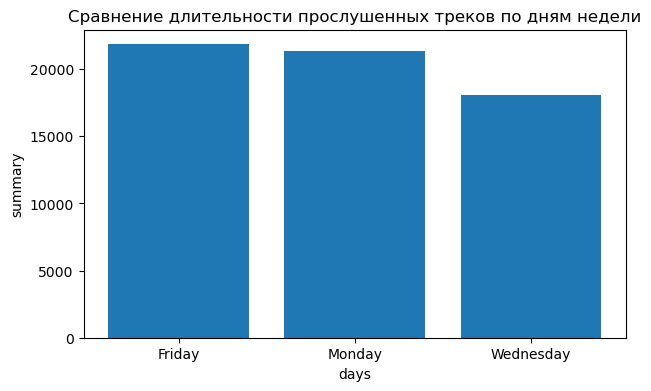

In [71]:
# Подсчёт прослушиваний в каждый из трёх дней
days_cities = df.groupby('day')['time'].count()

cities_visualisation(days_cities.index, 
                     days_cities.values, 
                     'days', 
                     'summary', 
                     'Сравнение длительности прослушенных треков по дням недели')


В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

Теперь подсчитаем времяп прослушивания для каждого города и каждому дню недели.

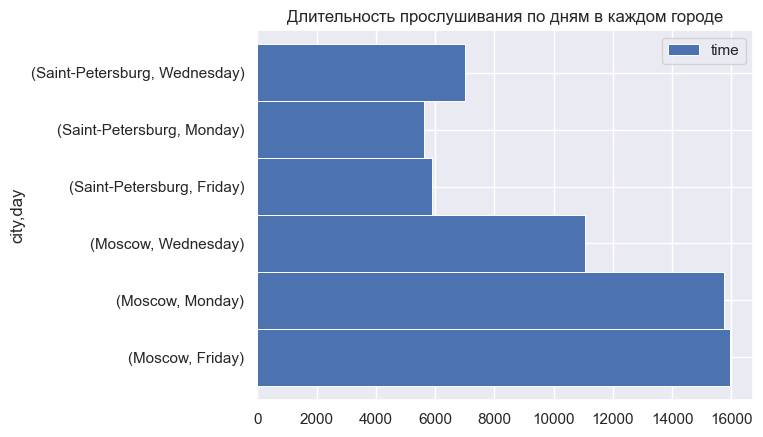

In [278]:
total = pd.pivot_table(df, index=['city', 'day'], values='time', aggfunc='count')
total.plot(kind='barh', width=1, edgecolor="white", linewidth=0.7,
           title='Длительность прослушивания по дням в каждом городе');

**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

**Задание 23**

Сохраните таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [28]:
moscow_general = df[df['city'] == 'Moscow']# получение таблицы moscow_general из тех строк таблицы df, 
# для которых значение в столбце 'city' равно 'Moscow'


In [29]:
spb_general = df[df['city'] == 'Saint-Petersburg']# получение таблицы spb_general из тех строк таблицы df,
# для которых значение в столбце 'city' равно 'Saint-Petersburg'


**Задание 24**

Создайте функцию `genre_weekday()` с четырьмя параметрами:
* таблица (датафрейм) с данными,
* день недели,
* начальная временная метка в формате 'hh:mm', 
* последняя временная метка в формате 'hh:mm'.

Функция должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [30]:

# Объявление функции genre_weekday() с параметрами table, day, time1, time2,
# которая возвращает информацию о самых популярных жанрах в указанный день в
# заданное время:
# 1) в переменную genre_df сохраняются те строки переданного датафрейма table, для
#    которых одновременно:
#    - значение в столбце day равно значению аргумента day
#    - значение в столбце time больше значения аргумента time1
#    - значение в столбце time меньше значения аргумента time2
#    Используйте последовательную фильтрацию с помощью логической индексации.
# 2) сгруппировать датафрейм genre_df по столбцу genre, взять один из его
#    столбцов и посчитать методом count() количество записей для каждого из
#    присутствующих жанров, получившийся Series записать в переменную
#    genre_df_count
# 3) отсортировать genre_df_count по убыванию встречаемости и сохранить
#    в переменную genre_df_sorted
# 4) вернуть Series из 10 первых значений genre_df_sorted, это будут топ-10
#    популярных жанров (в указанный день, в заданное время)

def genre_weekday(df, day, time1, time2):
    # последовательная фильтрация
    # оставляем в genre_df только те строки df, у которых день равен day
    genre_df = df[df['day'] == day]# ваш код здесь
    # оставляем в genre_df только те строки genre_df, у которых время меньше time2
    genre_df = genre_df[genre_df['time'] > time1]# ваш код здесь
    # оставляем в genre_df только те строки genre_df, у которых время больше time1
    genre_df = genre_df[genre_df['time'] < time2]# ваш код здесь
    # сгруппируем отфильтрованный датафрейм по столбцу с названиями жанров, возьмём столбец genre и посчитаем кол-во строк для каждого жанра методом count()
    genre_df_grouped = genre_df.groupby('genre')['genre'].count()# ваш код здесь
    # отсортируем результат по убыванию (чтобы в начале Series оказались самые популярные жанры)
    genre_df_sorted = genre_df_grouped.sort_values(ascending=False)# ваш код здесь
    # вернём Series с 10 самыми популярными жанрами в указанный отрезок времени заданного дня
    return genre_df_sorted[:10]

**Задание 25**


Cравните результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

In [31]:
genre_weekday(moscow_general, 'Monday', '07:00', '11:00')
# вызов функции для утра понедельника в Москве (вместо df — таблица moscow_general)
# объекты, хранящие время, являются строками и сравниваются как строки
# пример вызова: genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: genre, dtype: int64

In [32]:
genre_weekday(spb_general, 'Monday', '07:00', '11:00')# вызов функции для утра понедельника в Петербурге (вместо df — таблица spb_general)

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: genre, dtype: int64

In [33]:
genre_weekday(moscow_general, 'Friday', '17:00', '23:00')# вызов функции для вечера пятницы в Москве

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: genre, dtype: int64

In [34]:
genre_weekday(spb_general, 'Friday', '17:00', '23:00')# вызов функции для вечера пятницы в Петербурге

genre
pop            256
electronic     216
rock           216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: genre, dtype: int64

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

**Задание 26**

Сгруппируйте таблицу `moscow_general` по жанру и посчитайте прослушивания треков каждого жанра методом `count()`. Затем отсортируйте результат в порядке убывания и сохраните его в таблице `moscow_genres`.

In [35]:
moscow_genres = moscow_general.groupby('genre')['genre'].count()
moscow_genres = moscow_genres.sort_values(ascending=False)# одной строкой: группировка таблицы moscow_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в moscow_genres

**Задание 27**

Выведите на экран первые десять строк `moscow_genres`:

In [36]:
print(moscow_genres.head(10))# просмотр первых 10 строк moscow_genres

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64


**Задание 28**


Теперь повторите то же и для Петербурга.

Сгруппируйте таблицу `spb_general` по жанру. Посчитайте прослушивания треков каждого жанра. Результат отсортируйте в порядке убывания и сохраните в таблице `spb_genres`:


In [37]:
spb_genres = spb_general.groupby('genre')['genre'].count()
spb_genres = spb_genres.sort_values(ascending=False)# одной строкой: группировка таблицы spb_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в spb_genres

**Задание 29**

Выведите на экран первые десять строк `spb_genres`:

In [38]:
print(spb_genres.head(10))# просмотр первых 10 строк spb_genres

genre
pop            2431
dance          1932
rock           1879
electronic     1736
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: genre, dtype: int64


**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## Итоги исследования

Вы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**На практике исследования содержат проверки статистических гипотез.**
Из данных одного сервиса не всегда можно сделать вывод о всех жителях города.
Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных. 
С методами проверок гипотез вы ещё познакомитесь в следующих темах.